# Julian Alamo-Rosas Notebook:

## Dataset:
https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh

## Introduction:
My group is trying to determine the best neigborhood to live in for cyclists. It is known that hundreds of cyclists die every year by car crash. The best neighborhood in my opinion would have as least traffic as possible because it would lower the chances of being hit by a car while cycling.

## Metric:
My metric is determining the daily average traffic count for each neighborhood. Using this I will be able to determine the neighborhood with the least traffic according to this dataset.

In [2]:
import pandas as pd
import geopandas
%matplotlib inline
data = pd.read_csv("traffic_count.csv")

In [22]:
trafficCount = data.groupby("neighborhood").mean()["average_daily_car_traffic"]
trafficCount = trafficCount.sort_values(ascending=True)
print(trafficCount)

neighborhood
South Side Flats            115.0
Lincoln Place               126.0
Lincoln-Lemington-Belmar    195.0
Fineview                    419.0
Allegheny West              477.0
                            ...  
South Oakland                 NaN
South Shore                   NaN
Swisshelm Park                NaN
Troy Hill                     NaN
Upper Lawrenceville           NaN
Name: average_daily_car_traffic, Length: 74, dtype: float64


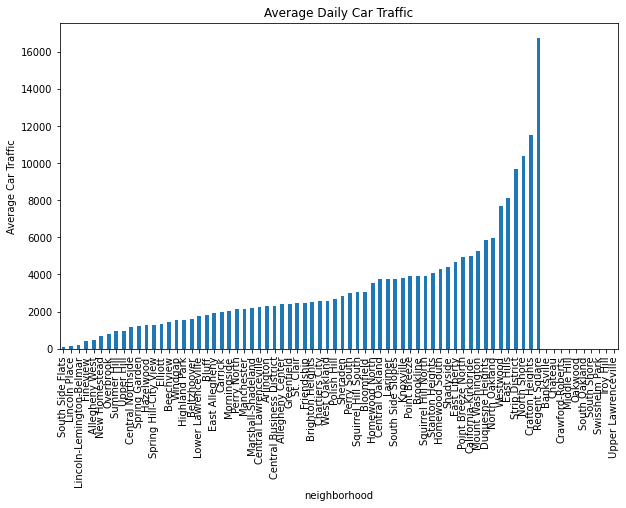

In [24]:
trafficCount.plot(kind = 'bar',
              ylabel = 'Average Car Traffic',
              figsize=(10, 6),
              title = "Average Daily Car Traffic")

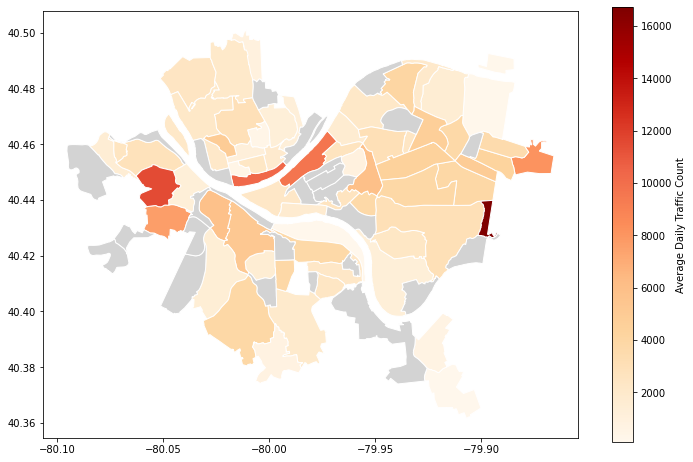

In [21]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
traffic_map = neighborhoods.merge(trafficCount, how='left', left_on='hood', right_on='neighborhood')
traffic_map.plot(column = "average_daily_car_traffic",
              cmap='OrRd',
               edgecolor="white", 
               legend=True,             
               legend_kwds={'label': "Average Daily Traffic Count"}, 
               figsize=(12, 8),
               missing_kwds={"color": "lightgrey"})

## Conclusion:
After my analysis I came to the conclusion that the best neighborhood to live in if you want as least traffic as possible is South Side Flats. It came in first with a traffic count of 115 bike rental racks. Coming in second place is Lincoln Place with 126 daily average traffic count. Lastly, coming in at third is Lincoln-Lemington-Belmar with 195 as its daily average traffic count. 